In [1]:
%matplotlib inline
from daomath.daomechanics import VectorField
from daomath.daomechanics import MaterialPoint
from daomath.ground import Ground
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np


[10, 9.7, 9.399999999999999, 9.099999999999998, 8.799999999999997, 8.499999999999996, 8.199999999999996, 7.899999999999996, 7.599999999999996, 7.299999999999996, 6.9999999999999964, 6.699999999999997, 6.399999999999997, 6.099999999999997, 5.799999999999997, 5.499999999999997, 5.1999999999999975, 4.899999999999998, 4.599999999999998, 4.299999999999998, 3.9999999999999982, 3.6999999999999984, 3.3999999999999986, 3.0999999999999988, 2.799999999999999, 2.499999999999999, 2.1999999999999993, 1.8999999999999992, 1.5999999999999992, 1.2999999999999992, 0.9999999999999991, 0.6999999999999991, 0.399999999999999, 0.09999999999999898, -0.20000000000000107, 0.09999999999999898, 0.399999999999999, 0.6999999999999991, 0.9999999999999991, 1.2999999999999992, 1.5999999999999992, 1.8999999999999992, 2.1999999999999993, 2.499999999999999, 2.799999999999999, 3.0999999999999988, 3.3999999999999986, 3.6999999999999984, 3.9999999999999982, 4.299999999999998, 4.599999999999998, 4.899999999999998, 5.199999999

# Physics Engine Implementation 

#### AUTHOR : <br> David Stankov

#### ABSTRACT <br>

### INTRODUCTION

### RESULTS main idea

### Vector Field </br>
Vector field in two dimensions is a function that assigns to each point (x,y) of the xy-plane a two-dimensional vector F(x,y). The standard notation is  $$\vec{F}(x,y) = V(x,y).\vec{i} + Q(x,y).\vec{j}  $$ </br>
deff : Vector field in two dimensions is a function that assigns to each point (x,y) of the xy-plane a two-dimensional vector F(x,y). The standard notation is  $$\vec{F}(x,y) = V(x,y).\vec{i} + Q(x,y).\vec{j}  $$ </br>  
The most famous example is force on surface $$\vec{G}(x,y) = 0.\vec{i} -g.\vec{j}$$ where g = 9.8 found by Galileo Galilei

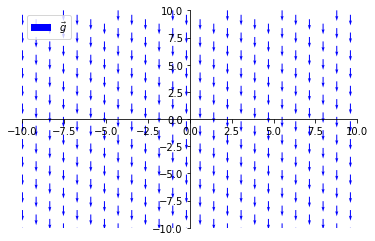

In [2]:
f = VectorField(lambda t,x,y : 0 , lambda t,x,y : -9.8)
f.plot_field(reduce=8,scale=10,width=0.003,label=r'$\vec{g}$')
plt.show()

 example 2 : $$\vec{G}(x,y) = -x.\vec{i} -y.\vec{j}$$ : 

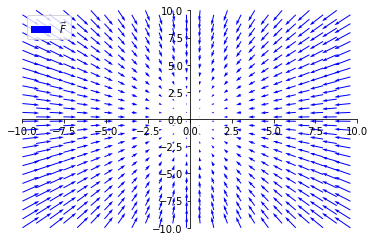

In [3]:

f = VectorField(lambda t,x,y : -x , lambda t,x,y : -y)
f.plot_field(reduce=4,scale=10,width=0.003)

plt.show()

### Second principle :</br> 
 $$ deff: 1) m.\frac{d^2\vec{r(t)}}{dt^2}=m.\frac{\vec{dv(t,\vec{r})}}{dt}=m.\frac{\vec{a}(t,\vec{r})}{dt}=\vec{F}(\vec{r},t)$$ </br> 
 where $$\vec{r},\vec{a},\vec{v},\vec{F}  \in E^3 $$ E-euclidian vector  space   is radious vector .The low can be difined as $$\frac{d\vec{p}}{dt} = \vec{F}$$ 
 In an inertial frame of reference, the vector sum of the forces F on an object is equal to the mass m of that object multiplied by the acceleration a of the object: F = ma.
The equation 1) is six order system ODE.For solution of the equations we will use Leapfrog integration ,because the algorithms is more stable than Euler's method especially in oscillatory motion

Let's see how the body will move in $$\vec{F}(x,y) = 0.\vec{i} -g.\vec{j}$$
throwing in 45 deggree

17


<Figure size 432x432 with 0 Axes>

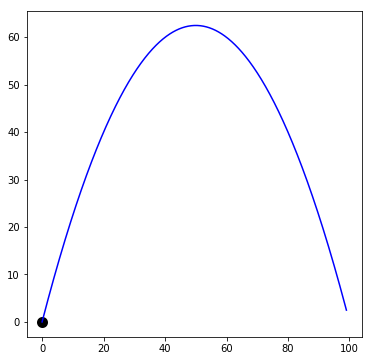

In [4]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))

u = lambda t, x, y: 0
v = lambda t, x, y: -10
point = MaterialPoint(x0=0, y0=0, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(20*np.cos(np.pi/4), +50*np.sin(np.pi/4),n=700)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(40))
print(size)
# <


anim = animation.FuncAnimation(plt.gcf(), point.update_HTML_animation,interval=100,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

let's to see radius vector

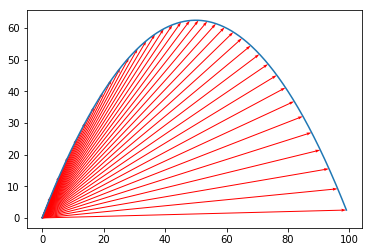

In [5]:

plt.plot(z[:,0],z[:,1])

point.plot_radios_vector()

if we change the the init value of velosity for exampe (0,50) we will see

<Figure size 432x432 with 0 Axes>

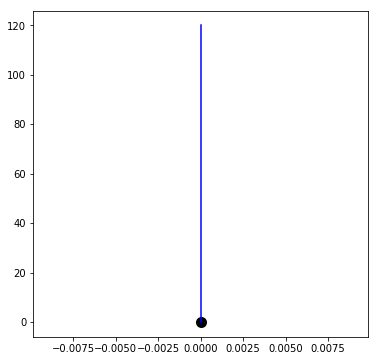

In [6]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))
z = point.calculate_radius_vector(0, 50,n=400)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(20))
anim = animation.FuncAnimation(plt.gcf(), point.update_HTML_animation,interval=100,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())


Gravity $$\vec{G}= -M.m (\frac{.x}{(x^2+y^2)^{3/2}}\vec{i} +\frac{.y}{(x^2+y^2)^{3/2}}\vec{j}) $$ Where F is the force, m1 and m2 are the masses of the objects interacting,we will consider the equation in more the simplified
in case that the one the mass of one body is in times bigger then other body.m1=1 with innial value x1 = 10 , y1 =10 v1 = - 

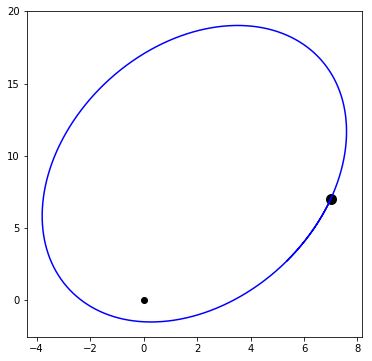

In [7]:
fig = plt.figure(figsize=(6, 6))
point = MaterialPoint(x0=10,y0=10)
# z = point.calculate_radius_vector(3,4)
# anim = animation.FuncAnimation(fig, point.update_HTML_animation, fargs=(Q, X, Y),
#                                interval=50, blit=False)
u = lambda t, x, y: -80 * x / ((x ** 2 + y ** 2) ** (3 / 2))
v = lambda t, x, y: -80 * y / ((x ** 2 + y ** 2) ** (3 / 2))
point = MaterialPoint(x0=7, y0=7, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(-1*np.cos(np.pi/4), -4*np.sin(np.pi/4),5000,h=0.005)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(100))
anim = animation.FuncAnimation(fig, point.update_HTML_animation,interval=50,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

In [8]:
we can notice that the velocity near to center (0,0) is fast,the we can to see

SyntaxError: invalid syntax (<ipython-input-8-9226c7df0f2c>, line 1)

In [ ]:
fig = plt.figure(figsize=(6, 6))
point = MaterialPoint(x0=10,y0=10)
# z = point.calculate_radius_vector(3,4)
# anim = animation.FuncAnimation(fig, point.update_HTML_animation, fargs=(Q, X, Y),
#                                interval=50, blit=False)
u = lambda t, x, y: -80 * x / ((x ** 2 + y ** 2) ** (3 / 2))
v = lambda t, x, y: -80 * y / ((x ** 2 + y ** 2) ** (3 / 2))
point = MaterialPoint(x0=7, y0=7, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(-10*np.cos(np.pi/4), -5*np.sin(np.pi/4),n=1000,h=0.003)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(100))
anim = animation.FuncAnimation(fig, point.update_HTML_animation,interval=50,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

In [ ]:
fig = plt.figure(figsize=(6, 6))
point = MaterialPoint(x0=10,y0=10)
# z = point.calculate_radius_vector(3,4)
# anim = animation.FuncAnimation(fig, point.update_HTML_animation, fargs=(Q, X, Y),
#                                interval=50, blit=False)
u = lambda t, x, y: -80 * x / ((x ** 2 + y ** 2) ** (3 / 2))
v = lambda t, x, y: -80 * y / ((x ** 2 + y ** 2) ** (3 / 2))
point = MaterialPoint(x0=10, y0=10, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(-1*np.cos(np.pi/4), -4*np.sin(np.pi/4),7000,h=0.01)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(100))
anim = animation.FuncAnimation(fig, point.update_HTML_animation,interval=50,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())


Work is the product of force and distance. In physics, a force is said to do work if, when acting, there is a movement of the point of application in the direction of the force.
For example, when a ball is held above the ground and then dropped, the work done on the ball as it falls is equal to the weight of the ball. (<-- two spaces)
The work of system by deff is integral of dW where  $$  dW =  \vec{F}.d\vec{r} = m.\vec{a}.\vec{r}$$
######  
1) $$\vec{F}.d\vec{r} = m.\vec{a}.\vec{r}=m.\frac{d\vec{v}} {dt}.\vec{v}.dt=m.\vec{v}.d\vec{v}$$
2) from 1 we have $$\vec{F}.d\vec{r}=m.\vec{v}.d\vec{v} \Leftrightarrow \int m.\vec{F}.d\vec{r} =\int m.\vec{v}.d\vec{v}  \Leftrightarrow \frac{m.v^2}{2} - \frac{m.v_0^2}{2}  =  V(\vec{r}) - V_0(\vec{r}) \Leftrightarrow \triangle T = \triangle V $$ 

T is kinetic V potential energy $$E + U = H$$ H is called total energy of system also  Hamilton 
$$grad\vec{F}=\vec{\triangledown}.U = \vec{F}$$

accordingly the  theorem of Green if $$ \int_C \vec{\triangledown}  \times \vec{F}=0$$ then then the vector field is potential and satisfy  $$grad\vec{F}=\vec{\triangledown}.U = \vec{F}$$

## The Law of conversations
For the first time in above example,we've saw the low of conservation .How does kinetic energy is transformed to potential energy and inverse process is the same .The most famous example is gravity on earth's surface:    
$$m.g.y - m.g.y_o = E - E_0 \Leftrightarrow E = H - m.g.y$$

There are many kinds of transformation of energy ,maybe that is the most deeply and fundamental law in physics.
Let's  see other kind of conversation - The Law of Momentum Conservation
Consider a collision between two objects.-obeject 1 and object 2 
Newton's third law says the force in moment of collision between obj1 and obj2 is equal in their magnitude and opposite in their direction
$$ 1)\vec{F_{12}} = - \vec{F_{21}}$$      

let's multiple  equation 1) with dt and after that we can   integrate it  $$\vec{F_{12}} = - \vec{F_{21}}  $$
    $$\vec{F_{12}}.dt = - \vec{F_{21}}.dt \Leftrightarrow  m.\vec{a_{12}}.dt  -m.\vec{a_{21}}.dt \Leftrightarrow \int m.\vec{a_{1}}.dt =\int m.\vec{a_{2}}.dt = m.\vec{v_{1}}.dt + m.\vec{v_{2}} \Leftrightarrow  \vec{p_{1}} + \vec{p_{2}} =\vec{p}$$
The conclusion from above operation is after collision the total momentum of system remains the sameThe conclusion from above operation is  after collision the total momentum of system   ramains the same 

Let  see what 's happens with energy conversation:
After the multiplacation of eaqution 1) on  both sides with $$\vec{dr}$$  and integration we achieve the  result
$$\vec{F_{12}}.d\vec{r} =-\vec{F_{21}}.d\vec{r} = T_{12} + T_{21} = H $$
The total energy between two particle remains the same.This result can be summarise for many particul

REFERENCES: <br> 
https://en.wikipedia.org/wiki/Work_(physics) <br>
Numerical Methods for Solving SYstems of Nonlinear Euqtions by Courtney Remani
http://www.astro.utu.fi/~cflynn/galdyn/lecture6.html?fbclid=IwAR31E-ezjjqEmMxxui7CkpEjrc32ACuMErAHQgK1sSsaifNRv2ss3FcPGaY


<Figure size 432x432 with 0 Axes>

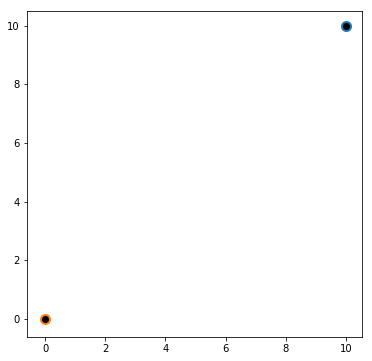

In [4]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))
g = Ground()
g.add_point(MaterialPoint(x0=10, y0=10, mass=1, v_x0=-1, v_y0=-1))
g.add_point(MaterialPoint(x0=0, y0=0, mass=1, v_x0=2, v_y0=2))
# g.add_point(MaterialPoint(x0=0, y0=10, mass=3, v_x0=2, v_y0=-2))
# g.add_point(MaterialPoint(x0=10, y0=0, mass=3, v_x0=-4, v_y0=4))
g.calculate_speed_points(end_time=100)
points = g.points

size = len(g.points[0].x_args)
anim = animation.FuncAnimation(fig, g.update_HTML_animation,interval=20,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())